## Import packages

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
import warnings
warnings.filterwarnings('ignore')

"""
This code is used for Fig2.C. Proportional distribution of U.S. counties with different levels of improvement in population-based accessibility. 
Data: Chenged Population-based accessibility from 2014 to 2024.
"""

'\nThis code is used for Fig2.C. Proportional distribution of U.S. counties with different levels of improvement in population-based accessibility. \nData: Chenged Population-based accessibility from 2014 to 2024.\n'

## Data Processing

In [2]:
def read_evse_excel_data(filename="Changed population-based-Acc.xlsx"):
    """
    Read EVSE data from Excel file with multiple sheets.
    """
    # Read all sheets from Excel file
    all_sheets = pd.read_excel(filename, sheet_name=None)
    return all_sheets


def cut_data(data):
    
    # 准备数据
    data_f = data.dropna()
    # 自定义分组边界（13个边界点产生12个区间）
    bins = [-np.inf, 0, 0.000000001, 25, 50, 75, 100, 125, 150, 175, 200, np.inf]
    # 对应的12个标签（比bins少1个）
    labels = ['<0', '0','0-25', '25-50', '50-75', '75-100', 
              '100-125', '125-150', '150-175', '175-200', '>200']
    
    # 分组并计算比例
    counts = pd.cut(data_f, bins=bins, labels=labels, right=False).value_counts(normalize=True).sort_index() * 100  # 转换为百分比
    return counts

## Mapping and Visualization

In [3]:
def plot_evse_proportion_grid(counts_all, counts_dc, counts_l2, counts_l1, figsize=(12, 10), dpi=100):
    """
    Plot all four EVSE proportion charts in a 2x2 grid layout.
    """
    # Define settings for each EVSE type
    type_settings = {
        'all': {
            'color': 'brown',
            'fit_color': 'darkred',
            'background': 'mistyrose',
            'title': 'All Chargers',
            'degree': 5,
            'y_offset': 0,
            'ylim': (-0.1, 50)
        },
        'dc': {
            'color': 'teal',
            'fit_color': 'teal',
            'background': 'lightcyan',
            'title': 'DC Chargers',
            'degree': 7,
            'y_offset': 0.1,
            'ylim': (-0.1, 50)
        },
        'l2': {
            'color': '#84BA42',
            'fit_color': '#84BA42',
            'background': 'mintcream',
            'title': 'L2 Chargers',
            'degree': 7,
            'y_offset': 0.1,
            'ylim': (-0.1, 50)
        },
        'l1': {
            'color': '#682487',
            'fit_color': '#682487',
            'background': 'lavender',
            'title': 'L1 Chargers',
            'degree': 8,
            'y_offset': 0.1,
            'ylim': (-0.1, 100)
        }
    }
    
    # Create 2x2 subplot grid
    fig, axes = plt.subplots(2, 2, figsize=figsize, dpi=dpi)
    axes = axes.flatten()  # Flatten to 1D array for easier indexing
    
    # Data and settings for each subplot
    plot_data = [
        (counts_all, 'all', 0),
        (counts_dc, 'dc', 1),
        (counts_l2, 'l2', 2),
        (counts_l1, 'l1', 3)
    ]
    
    for counts, evse_type, idx in plot_data:
        ax = axes[idx]
        settings = type_settings[evse_type]
        
        # Calculate positions
        bar_width = 0.6
        x = np.arange(len(counts))
        
        # Set background
        ax.set_facecolor(settings['background'])
        
        # Plot bars
        bars = ax.bar(x, counts.values, width=bar_width, 
                      color=settings['color'])
        
        # Add polynomial fit curve
        coefs = Polynomial.fit(x, counts.values, deg=settings['degree']).convert().coef
        poly_curve = np.poly1d(coefs[::-1])
        x_fit = np.linspace(x.min() - 0.5, x.max() + 0.5, 100)
        y_fit = poly_curve(x_fit) + settings['y_offset']
        
        # Plot fit curve
        ax.plot(x_fit, y_fit, color=settings['fit_color'], 
                linewidth=2, linestyle='--')
        
        # Configure axes
        ax.set_xticks(x)
        ax.set_xticklabels(counts.index, rotation=90, fontsize=16)
        
        # Set labels
        ax.set_ylabel(r'$\bf{Proportion\%}$', fontsize=16)
        ax.set_xlabel(r'$\bf{Increased \ Pop.-based\ Acc.}$', fontsize=16, 
                      rotation=180, va='bottom', labelpad=15)
        
        # Set limits
        ax.set_ylim(settings['ylim'])
        
        # Add subplot title
        ax.set_title(f'{settings["title"]}', fontsize=16, fontweight='bold', pad=10)
        
        # Add grid
        ax.grid(True, linestyle='--', alpha=0.3)
    
    # Adjust layout
    plt.tight_layout(pad=3.0)
    
    return fig, axes


## Test run

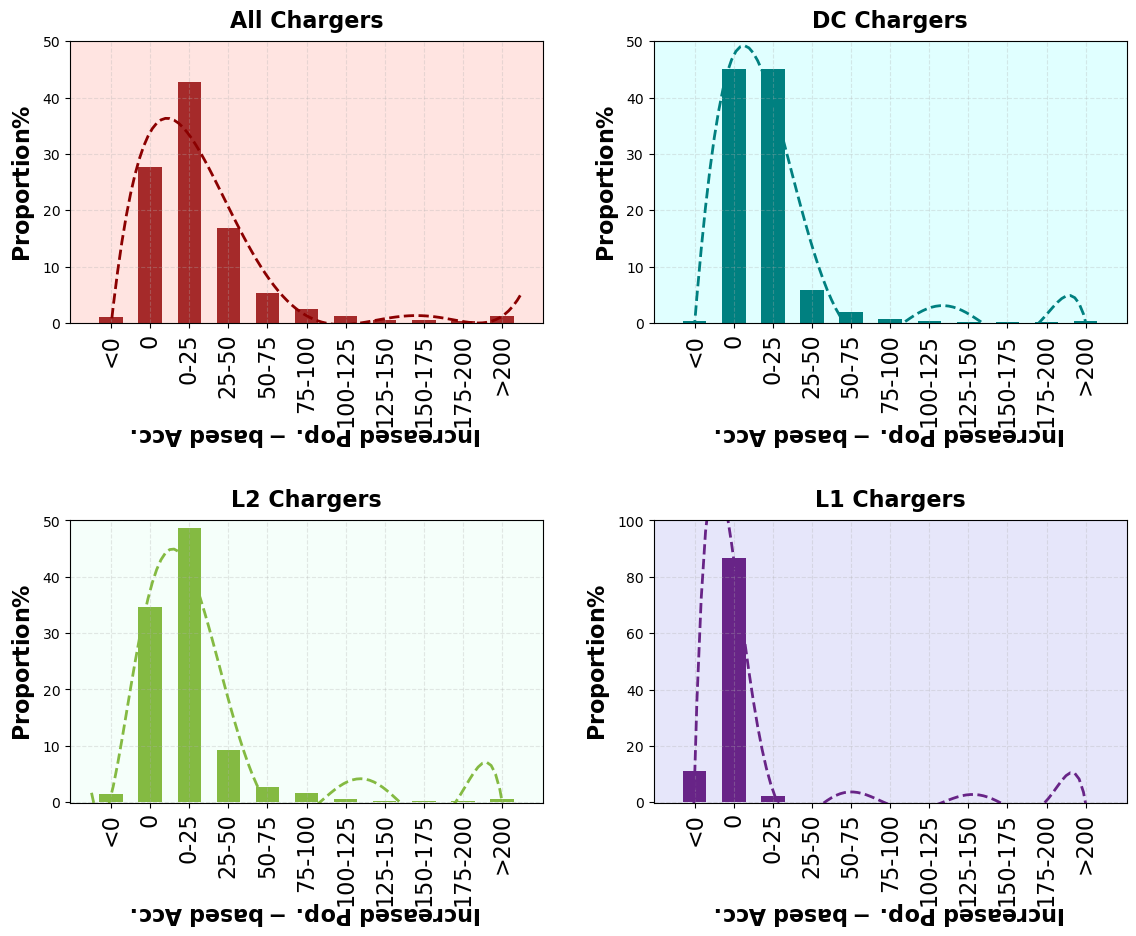

In [4]:
if __name__ == "__main__":
    # Read the Excel file
    evse_data = read_evse_excel_data("Changed population-based-Acc.xlsx")
    
    # Access individual sheets
    if evse_data is not None:
        final_gdf_all_evse = evse_data["All_EVSE"]
        final_gdf_dc_evse = evse_data["DC_EVSE"]
        final_gdf_l1_evse = evse_data["L1_EVSE"]
        final_gdf_l2_evse = evse_data["L2_EVSE"]

    # data processing
    counts_all = cut_data(final_gdf_all_evse['increased'])
    counts_dc = cut_data(final_gdf_dc_evse['increased'])
    counts_l1 = cut_data(final_gdf_l1_evse['increased'])
    counts_l2 = cut_data(final_gdf_l2_evse['increased'])
    
    # visualization
    fig, axes = plot_evse_proportion_grid(counts_all, counts_dc, counts_l2, counts_l1)
    plt.show()